According to the World Health Organization (WHO) Stroke is ranked 2nd in causes of death, it is responsible for approximately 11% of total deaths. this problem can be addressed by our algorithm which will classifiy stroke based on outout parameters such as cigeretes per day, blood pressure, total chloride etc.

In [63]:
#General Libraries
import numpy as np
import pandas as pd 

#Machine Learning Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Data Visualiztion Libraries
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt


Importing all the necessary libraries needed for the algorithm.

In [64]:
dataset = pd.read_csv('/content/Dataset_raw.csv')

In [65]:
dataset.head()  


,RANDID,TOTCHOL,AGE,SYSBP,DIABP,TIMEMI,CIGPDAY,TIME,STROKE,BMI
0,2448,196.0,52.0,100.0,62.0,6438.0,0.0,4628,2.0,NaN
1,6238,223.0,58.0,122.0,75.0,8766.0,0.0,4344,2.0,28.5
2,11252,232.0,58.0,131.0,70.0,8766.0,0.0,4285,2.0,24.6
3,11263,216.0,55.0,140.0,70.0,8766.0,0.0,4351,1.0,31.2
4,12806,208.0,57.0,127.0,75.0,8766.0,0.0,4289,2.0,22.0


The data contains missing values. So our first step will be to clean the data. Data cleaning is a crucial step because it will improve the quality of data which will lead to high productivity. when the data is clean, there will be no outdated or incorrect information.

In [66]:
df = dataset.copy()

df = df.dropna()
df.head()

,RANDID,TOTCHOL,AGE,SYSBP,DIABP,TIMEMI,CIGPDAY,TIME,STROKE,BMI
1,6238,223.0,58.0,122.0,75.0,8766.0,0.0,4344,2.0,28.5
2,11252,232.0,58.0,131.0,70.0,8766.0,0.0,4285,2.0,24.6
3,11263,216.0,55.0,140.0,70.0,8766.0,0.0,4351,1.0,31.2
4,12806,208.0,57.0,127.0,75.0,8766.0,0.0,4289,2.0,22.0
5,14367,177.0,64.0,148.0,66.0,8766.0,18.0,4438,1.0,25.7


The dropna() functions drops or deletes all the NaN values that are present in the dataset.

In [67]:
df.count() #counting all the values in the column

RANDID     596
TOTCHOL    596
AGE        596
SYSBP      596
DIABP      596
TIMEMI     596
CIGPDAY    596
TIME       596
STROKE     596
BMI        596
dtype: int64

In [68]:
df.info() # using this method for printing information about a dataframe which includes 
#the index dtype and column dtypes, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 1 to 618
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RANDID   596 non-null    int64  
 1   TOTCHOL  596 non-null    float64
 2   AGE      596 non-null    float64
 3   SYSBP    596 non-null    float64
 4   DIABP    596 non-null    float64
 5   TIMEMI   596 non-null    float64
 6   CIGPDAY  596 non-null    float64
 7   TIME     596 non-null    int64  
 8   STROKE   596 non-null    float64
 9   BMI      596 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 51.2 KB


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RANDID,596.0,927867.114094,518676.855985,6238.0,523319.25,928740.00,1363692.250,1833245.0
TOTCHOL,596.0,216.236577,39.478909,135.0,190.00,209.50,232.000,390.0
AGE,596.0,60.231544,8.313202,45.0,53.00,59.00,67.000,79.0
SYSBP,596.0,137.071309,25.936970,94.0,119.00,130.00,152.000,254.0
DIABP,596.0,77.594799,12.241642,30.0,70.00,75.50,83.625,119.0
TIMEMI,596.0,8082.177852,1437.188279,27.0,8411.25,8766.00,8766.000,8766.0
CIGPDAY,596.0,3.567114,8.415703,0.0,0.00,0.00,0.000,40.0
TIME,596.0,4345.833893,93.368364,3938.0,4300.75,4359.00,4397.000,4703.0
STROKE,596.0,1.498322,0.500417,1.0,1.00,1.00,2.000,2.0
BMI,596.0,25.870638,4.330776,15.2,22.90,25.55,28.000,48.6


Plotting the number of strokes in the dataset and the total strokes

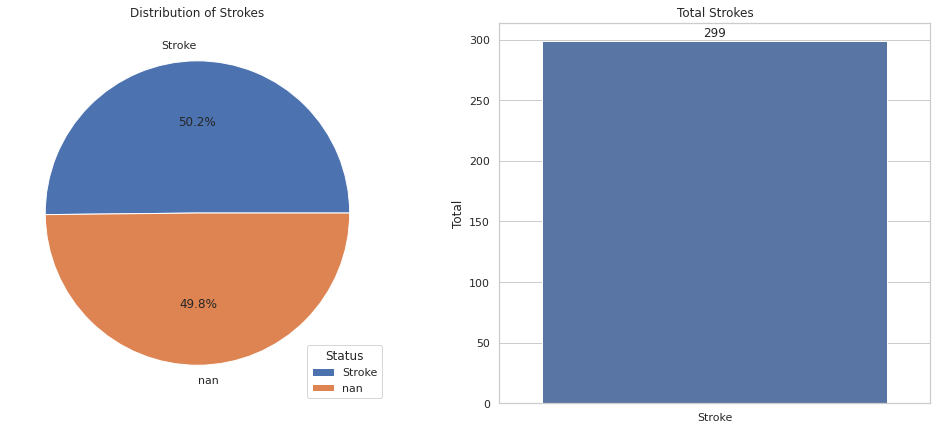

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))

ax1.pie(x=df['STROKE'].value_counts(), labels=df['STROKE'].value_counts().index.map({0:'Not Stroke', 1:'Stroke'}), autopct='%1.1f%%')
ax1.legend(
    title='Status',
    loc = 'lower right')
ax1.set_title('Distribution of Strokes')

plots = sns.barplot(x=df['STROKE'].value_counts().index.map({0:'Not Stroke', 1:'Stroke'}), y=df['STROKE'].value_counts(), ax=ax2)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')
ax2.set_ylabel('Total')
ax2.set_title('Total Strokes')

plt.show()

In [71]:
df_stroked = df[df['STROKE'] == 1].reset_index(drop=True)
df_stroked


,RANDID,TOTCHOL,AGE,SYSBP,DIABP,TIMEMI,CIGPDAY,TIME,STROKE,BMI
0,11263,216.0,55.0,140.0,70.0,8766.0,0.0,4351,1.0,31.2
1,14367,177.0,64.0,148.0,66.0,8766.0,18.0,4438,1.0,25.7
2,16799,207.0,62.0,165.0,91.0,8766.0,30.0,4431,1.0,22.0
3,24721,168.0,51.0,145.0,73.0,6411.0,20.0,4408,1.0,24.8
4,45464,232.0,64.0,161.0,78.0,8766.0,0.0,4368,1.0,24.0
...,...,...,...,...,...,...,...,...,...,...
294,1811847,242.0,48.0,167.0,82.0,8766.0,0.0,4548,1.0,21.6
295,1828967,201.0,59.0,149.0,80.0,8766.0,0.0,4285,1.0,30.5
296,1829622,212.0,61.0,187.0,105.0,8766.0,0.0,4287,1.0,22.7
297,1831641,306.0,70.0,170.0,85.0,8766.0,0.0,4365,1.0,24.1


Plotting the distribution of age 

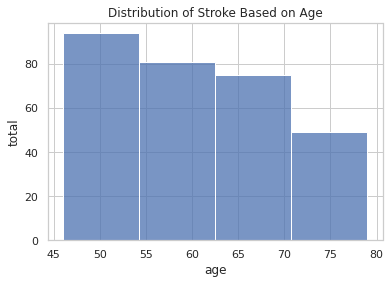

In [72]:
sns.histplot(df_stroked['AGE'], bins=4)
plt.xlabel('age')
plt.ylabel('total')
plt.title('Distribution of Stroke Based on Age')
plt.show()

plotting the relation between bmi and age in the dataset

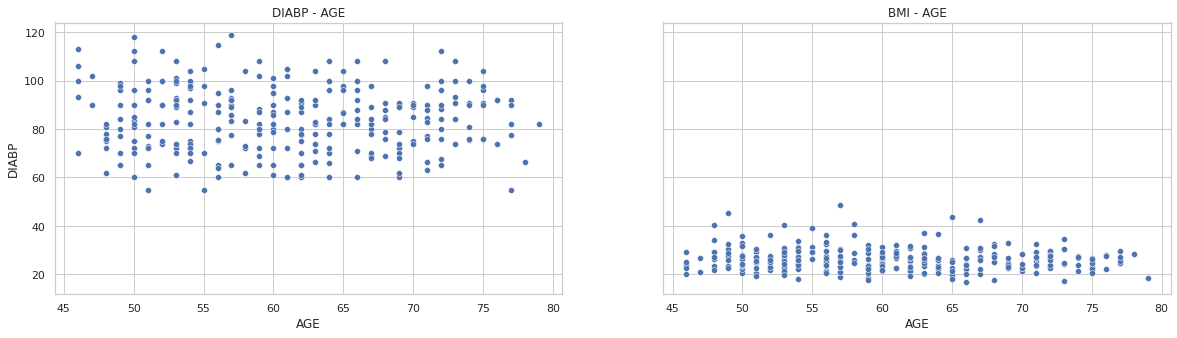

In [73]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,5))

sns.scatterplot(x=df_stroked['AGE'], y=df_stroked['DIABP'], ax=ax1)
ax1.set_xlabel('AGE')
ax1.set_ylabel('DIABP')
ax1.set_title('DIABP - AGE')

sns.scatterplot(x=df_stroked['AGE'], y=df_stroked['BMI'], ax=ax2)
ax2.set_xlabel('AGE')
ax2.set_ylabel('BMI')
ax2.set_title('BMI - AGE')

plt.show()

In [74]:
#Removing Outliers
q = df_stroked['AGE'].quantile(0.01)
df_stroked = df_stroked[df_stroked['AGE'] > q].reset_index(drop=True)
df_stroked

,RANDID,TOTCHOL,AGE,SYSBP,DIABP,TIMEMI,CIGPDAY,TIME,STROKE,BMI
0,11263,216.0,55.0,140.0,70.0,8766.0,0.0,4351,1.0,31.2
1,14367,177.0,64.0,148.0,66.0,8766.0,18.0,4438,1.0,25.7
2,16799,207.0,62.0,165.0,91.0,8766.0,30.0,4431,1.0,22.0
3,24721,168.0,51.0,145.0,73.0,6411.0,20.0,4408,1.0,24.8
4,45464,232.0,64.0,161.0,78.0,8766.0,0.0,4368,1.0,24.0
...,...,...,...,...,...,...,...,...,...,...
289,1811847,242.0,48.0,167.0,82.0,8766.0,0.0,4548,1.0,21.6
290,1828967,201.0,59.0,149.0,80.0,8766.0,0.0,4285,1.0,30.5
291,1829622,212.0,61.0,187.0,105.0,8766.0,0.0,4287,1.0,22.7
292,1831641,306.0,70.0,170.0,85.0,8766.0,0.0,4365,1.0,24.1


In [75]:
#Dependent variable

df["STROKE"].value_counts() 

#1 = Stroke, 0= No stroke

1.0    299
2.0    297
Name: STROKE, dtype: int64

In [76]:
y = df["STROKE"] #Dependent variable
X = df.drop(["STROKE"], axis=1) #Independent variable

In [77]:

X = X.drop(["RANDID"], axis=1)
X.head()

,TOTCHOL,AGE,SYSBP,DIABP,TIMEMI,CIGPDAY,TIME,BMI
1,223.0,58.0,122.0,75.0,8766.0,0.0,4344,28.5
2,232.0,58.0,131.0,70.0,8766.0,0.0,4285,24.6
3,216.0,55.0,140.0,70.0,8766.0,0.0,4351,31.2
4,208.0,57.0,127.0,75.0,8766.0,0.0,4289,22.0
5,177.0,64.0,148.0,66.0,8766.0,18.0,4438,25.7


Now we will split the data into trainig and testing using train test split, it is basically a technique for evaluating the performance of a machine learning algorithm, it is mainly used in all types of supervised learning algorithms. 
It is used by taking the datasset and dividing it into two subsets. The first subset is going to be used for fitting the model and is reffered to as the training set. The second subset will not be used to train the model; instead, the input element of the dataset is provided to the model.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

**Logistic Regression**

The first machine learning that we will be using is Logistic regression, it is a classification algorithm which is used to classify data with the help of activation functions.

In [79]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

testscore_lr =accuracy_score(y_test, loj_model.predict(X_test))
accuracy_score(y_test, loj_model.predict(X_test))

0.9083333333333333

The logistic regression has an accuracy of 90% on the dataset. now we'll check its cross validation score

In [80]:
crosscore_lr =cross_val_score(loj_model, X_test, y_test, cv = 10).mean() 
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.8916666666666668

The Logistic Regresson has 89% of cross validation score.
 

**Naive Bayes**

The next algorithm we will use is Naive Bayes algorithm which is a probabilistic classifier, which means it predicts on the basis of probability of data

In [81]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

y_pred = nb_model.predict(X_test)
testscore_nb =   accuracy_score(y_test, y_pred) 
accuracy_score(y_test, y_pred) 

0.8583333333333333

In [82]:
crosscore_nb=cross_val_score(nb_model, X_test, y_test, cv = 10).mean() 
cross_val_score(nb_model, X_test, y_test, cv = 10).mean() 

0.8166666666666667

The Naive Bayes algorithm has an accuracy of 85% which is less than logistic regression and also the cross validation score of the algorithm is also less as compared to logistic regression.

**Support Vector Machine**

The next algorithm we will be using is support vector machines, it is a set of supervised learning methods which are used ofr classification, regression and outlier detection. one of the advantages of svm is that it peforms well on high dimensional spaces.

In [83]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

testscore_svm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred) #test acc

0.8833333333333333

The svm performed well as compared to Naive Bayes but still not as well as logistic regression but we will try fitting the best parameters and check its cross validation score

In [84]:
svc_params = {"C": np.arange(1,2)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

print("The best parameters: " + str(svc_cv_model.best_params_))


Fitting 10 folds for each of 1 candidates, totalling 10 fits
The best parameters: {'C': 1}


In [85]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(X_train, y_train)

y_pred = svc_tuned.predict(X_test)
crosscore_svm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.8833333333333333

looking at the performance and cross validation scores of all 3 algorithms we conclude that the logisitc regression performs well as compared to Naive Bayes and SVM so Logistic Regression will be considered for the prediction of strokes